# Classification Using ML Algorithms

## Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('student-por.csv')

In [16]:
df = pd.DataFrame(data)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


<Axes: >

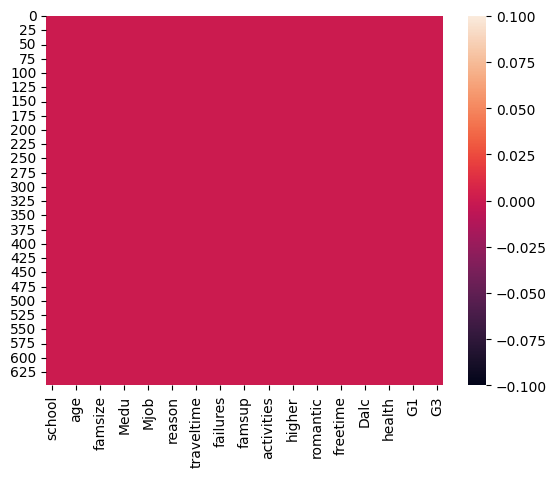

In [17]:
sns.heatmap(df.isnull())

In [20]:
df['sex'] = df['sex'].map({'F':0,'M':1})
df['school'] = df['school'].map({'GP':0,'MS':1})
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [22]:
correlation = df[['school','age','Medu','Fedu','goout','Dalc','Walc','health','absences','G1','G2','G3','sex']].corr()
mostly_correlated = correlation['school'].sort_values(ascending=False)
mostly_correlated[1:6]

age       0.087170
Dalc      0.047169
goout     0.044632
Walc      0.014169
health   -0.058599
Name: school, dtype: float64

In [23]:
X = df[['sex','age','Medu','Fedu','famrel','freetime','goout','Dalc','Walc','health','G1','G2']].values
y = df['school']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Training the model
logreg.fit(X_train, y_train)

# Predicting the results on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluating the model performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")


Logistic Regression Accuracy: 0.7308


## SLP & MLP

In [25]:
X = df[['sex','age','Medu','Fedu','famrel','freetime','goout','Dalc','Walc','health','G1','G2']].values
y = df['school']

In [26]:
y = (y == 0).astype(int)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [31]:
class SingleLayerPerceptron:
    def __init__(self, input_size, lr=0.01, epochs=100):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.lr = lr
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return self.activation(z)

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.lr * error * X[i]
                self.bias += self.lr * error

In [32]:
slp = SingleLayerPerceptron(input_size=X_train.shape[1], lr=0.01, epochs=500)
slp.train(X_train, y_train)

In [33]:
y_pred = [slp.predict(x) for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 62.31%


In [34]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

In [35]:
X = df[['sex','age','Medu','Fedu','famrel','freetime','goout','Dalc','Walc','health','G1','G2']].values
y = df['school']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [39]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

NameError: name 'model' is not defined

In [40]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

NameError: name 'model' is not defined

## Gaussian Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initializing Gaussian Naive Bayes model
gnb = GaussianNB()

# Training the model
gnb.fit(X_train, y_train)

# Predicting the results on the test set
y_pred_gnb = gnb.predict(X_test)

# Evaluating the model performance
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb:.4f}")

Gaussian Naive Bayes Accuracy: 0.7000


## SVM

In [42]:
from sklearn.svm import SVC

In [43]:
svm = SVC(kernel='linear')

In [45]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
svm.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [47]:
y_pred = svm.predict(X_test_scaled)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy:',accuracy)

Accuracy: 0.7538461538461538


## KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)

In [52]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [53]:
y_pred = knn.predict(X_test_scaled)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy:',accuracy)

Accuracy: 0.6538461538461539
